# Read SEG-Y with obspy

## Follow the excellent tutorial at the Agile [Blog](https://agilescientific.com/blog/2016/9/21/x-lines-of-python-read-and-write-seg-y) and the associated [notebook](https://notebooks.gesis.org/binder/jupyter/user/agile-geoscience-xlines-jvmr4j6a/notebooks/notebooks/01_Read_and_write_SEG-Y.ipynb)

### In this example we read in and plot the central Inline and Crossline of the Kerry 3D [dataset](https://wiki.seg.org/wiki/Kerry-3D)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from obspy.io.segy.segy import _read_segy

stream = _read_segy('Desktop/Kerry3D.segy', headonly=True)

In [4]:
print(stream.textual_file_header.decode())

C01 AREA        : OFFSHORE TARANAKI - OFFSHORE TARANAKI SEISMIC DATABASE        C02 DESCRIPTION : KERRY3D SEISMIC COVERAGE - PHASE MATCHED IN GEOFRAME          C03 =========================================================================== C04 DATE     :1996       CLASS      :RAW MIGRATION /+90 DEGREE PHASE SHIFT      C05 OPERATOR :WMC        PROCESSING :DIGICON SINGAPORE                          C06 =========================================================================== C07 THE 3D DATA HAS BEEN DATUM AND PHASE SHIFTED. DATA HAS BEEN MERGED WITH     C08 CHECKED NAV AND EXPORTED FROM GEOFRAME 4.2 IN STANDARD SEGY.                C09 INLINES/SP RANGE :510-796 CDP INC       :1        SAMPLE INTERVAL :4000     C10 XLINES/CDP RANGE :58-792  SAMPLES/TRACE :1251     FINAL TIME :5000          C11 LINE INC      :1  TRACES/LINE   :VARIABLE IL/XL X/EAST Y/NORTH              C12 =========================================================================== C13 THIS DATASET WAS PREPARED AND COMPIL

In [6]:
x = np.array(list(stream.textual_file_header.decode()))
print('\n'.join(''.join(row) for row in x.reshape((40, 80))))

C01 AREA        : OFFSHORE TARANAKI - OFFSHORE TARANAKI SEISMIC DATABASE        
C02 DESCRIPTION : KERRY3D SEISMIC COVERAGE - PHASE MATCHED IN GEOFRAME          
C03 =========================================================================== 
C04 DATE     :1996       CLASS      :RAW MIGRATION /+90 DEGREE PHASE SHIFT      
C05 OPERATOR :WMC        PROCESSING :DIGICON SINGAPORE                          
C06 =========================================================================== 
C07 THE 3D DATA HAS BEEN DATUM AND PHASE SHIFTED. DATA HAS BEEN MERGED WITH     
C08 CHECKED NAV AND EXPORTED FROM GEOFRAME 4.2 IN STANDARD SEGY.                
C09 INLINES/SP RANGE :510-796 CDP INC       :1        SAMPLE INTERVAL :4000     
C10 XLINES/CDP RANGE :58-792  SAMPLES/TRACE :1251     FINAL TIME :5000          
C11 LINE INC      :1  TRACES/LINE   :VARIABLE IL/XL X/EAST Y/NORTH              
C12 =========================================================================== 
C13 THIS DATASET WAS PREPARE

#### Trace data can be accessed via stream.traces

In [50]:
stream

210945 traces in the SEG Y structure.

#### As per EBCDIC there are 287 Inlines and 735 Crossline. The central Inline in the cube will be the 144th Inline

In [58]:
iter_data = []
for t in stream.traces[105105:105839]:
    iter_data.append(t.data)
central_il = np.stack(iter_data)
central_il.shape

(734, 1252)

In [56]:
vm = np.percentile(central_il, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

The 99th percentile is 3; the max amplitude is 13


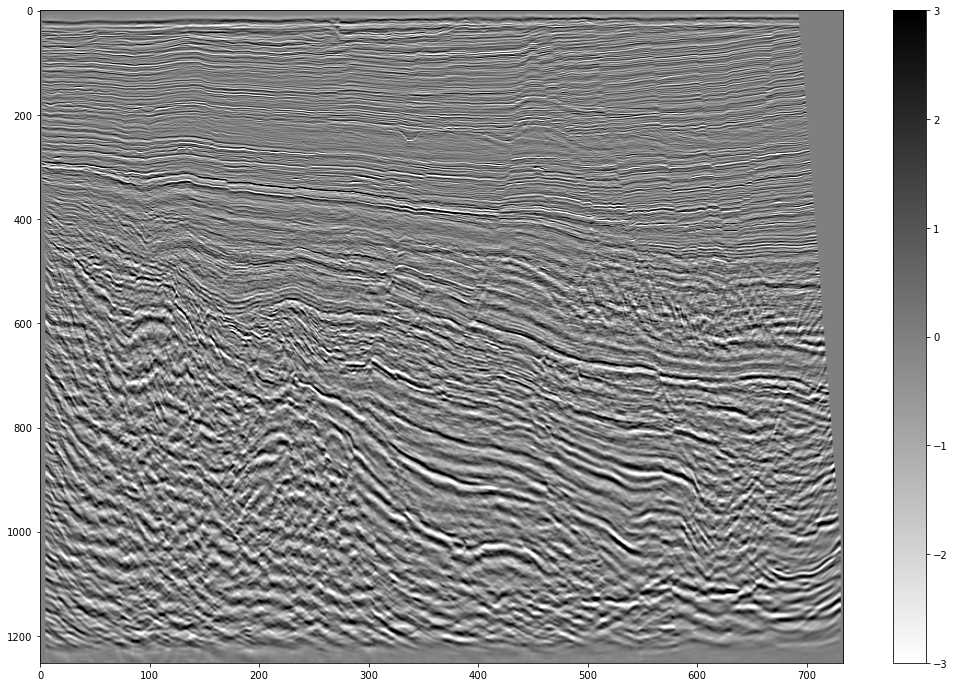

In [57]:
plt.figure(figsize=(18,12))
plt.imshow(central_il.T, cmap="gist_yarg", vmin=-3, vmax=3, aspect='auto')
plt.colorbar()
plt.show()

In [59]:
iter_data = []
for t in stream.traces[367::735]:
    iter_data.append(t.data)
central_xl = np.stack(iter_data)
central_xl.shape

(287, 1252)

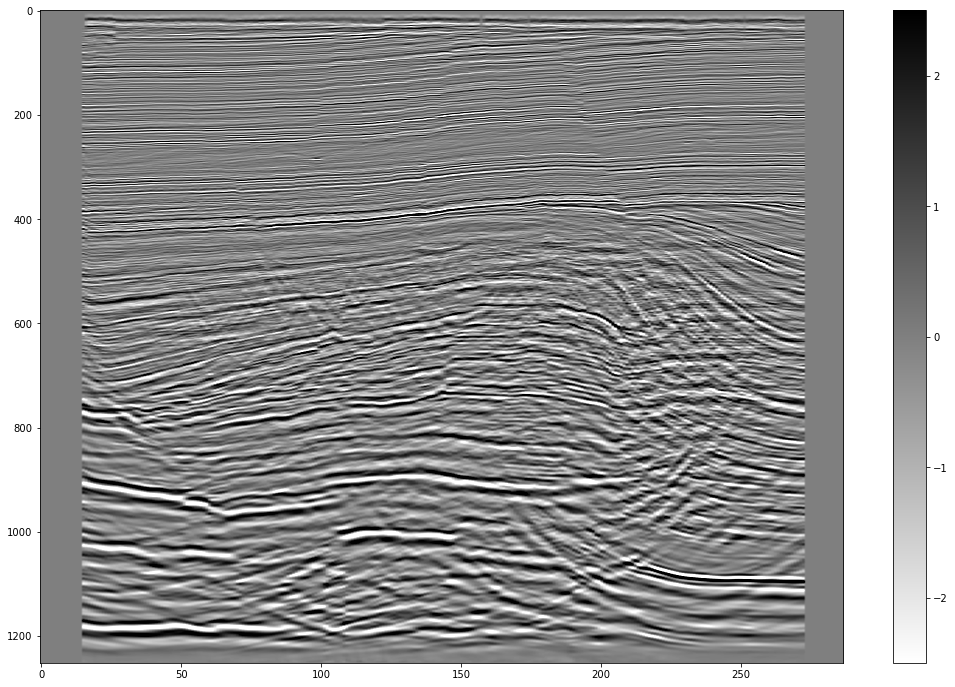

In [60]:
plt.figure(figsize=(18,12))
plt.imshow(central_xl.T, cmap="gist_yarg", vmin=-2.5, vmax=2.5, aspect='auto')
plt.colorbar()
plt.show()